In [1]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

In [2]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [3]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Feature Engineering

Create AgeBucket Feature

In [11]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
test_data["AgeBucket"] = test_data["Age"] // 15 * 15
train_data.AgeBucket.value_counts()

15.0    306
30.0    215
45.0     89
0.0      78
60.0     25
75.0      1
Name: AgeBucket, dtype: int64

In [12]:
train_data = train_data.drop(columns=['Age'])
test_data = test_data.drop(columns=['Age'])
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,15.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,15.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,30.0


 Create RelativesOnboard Feature

In [13]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
test_data["RelativesOnboard"] = test_data["SibSp"] + test_data["Parch"]
train_data.RelativesOnboard.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: RelativesOnboard, dtype: int64

In [14]:
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [15]:
train_data = train_data.drop(columns=['SibSp', 'Parch'])
test_data = test_data.drop(columns=['SibSp', 'Parch'])
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard
0,1,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,NaN,S,15.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,C85,C,30.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,NaN,S,15.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,C123,S,30.0,1
4,5,0,3,"Allen, Mr. William Henry",male,373450,8.0500,NaN,S,30.0,0


Create TravellingAlone Feature

In [16]:
train_data['TravellingALone'] = train_data['RelativesOnboard'].apply(lambda x: 1 if x <= 0 else 0)
test_data['TravellingALone'] = test_data['RelativesOnboard'].apply(lambda x: 1 if x <= 0 else 0)
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard,TravellingALone
0,1,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,NaN,S,15.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,C85,C,30.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,NaN,S,15.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,C123,S,30.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,373450,8.0500,NaN,S,30.0,0,1


Create IsFirstClass Feature

In [17]:
train_data[["Pclass", "Survived"]].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [18]:
train_data['IsFirstClass'] = train_data['Pclass'].apply(lambda x: 1 if x == 1 else 0)
test_data['IsFirstClass'] = test_data['Pclass'].apply(lambda x: 1 if x == 1 else 0)
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked,AgeBucket,RelativesOnboard,TravellingALone,IsFirstClass
0,1,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,NaN,S,15.0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,C85,C,30.0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,NaN,S,15.0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,C123,S,30.0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,373450,8.0500,NaN,S,30.0,0,1,0


Work on Fares

In [19]:
#train_data['Fare'] = train_data['Fare'].apply(lambda x: 100 if x >= 100 else x)
#test_data['Fare'] = test_data['Fare'].apply(lambda x: 100 if x >= 100 else x)
#train_data.Fare.hist(bins=20)

Create Title Feature

In [20]:
# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# A list with the all the different titles
titles = sorted(set([x for x in train_data.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

# Lets create a new column for the titles
train_data['Title'] = train_data['Name'].map(lambda x: get_title(x))
test_data['Title'] = train_data['Name'].map(lambda x: get_title(x))


# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
train_data['Title'] = train_data.apply(replace_titles, axis=1)
test_data['Title'] = train_data.apply(replace_titles, axis=1)

# Check that the number of Mr, Mrs and Miss are the same that 'male' and 'female'
print('Title column values. Males and females are the same that for the "Sex" column:')
print(train_data.Title.value_counts())

# Plot the result
train_data.Title.value_counts().plot(kind='bar')

Different titles found on the dataset:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']

Title column values. Males and females are the same that for the "Sex" column:
Mr        537
Miss      185
Mrs       129
Master     40
Name: Title, dtype: int64


Create NoCabin Feature

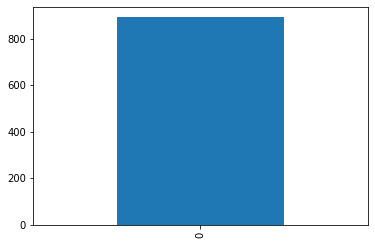

In [21]:
import numpy as np
train_data['NoCabin'] = train_data['Cabin'].apply(lambda x: 1 if x == np.nan else 0)
test_data['NoCabin'] = test_data['Cabin'].apply(lambda x: 1 if x == np.nan else 0)
train_data.NoCabin.value_counts().plot(kind='bar')

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Numerical attributes pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["AgeBucket", "RelativesOnboard", "Fare", "TravellingALone", "IsFirstClass", "NoCabin"])),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [24]:
num_pipeline.fit_transform(train_data)

array([[-0.49336646,  0.05915988, -0.50244517, -1.2316449 , -0.56568542,
         0.        ],
       [ 0.62234298,  0.05915988,  0.78684529, -1.2316449 ,  1.76776695,
         0.        ],
       [-0.49336646, -0.56097483, -0.48885426,  0.81192233, -0.56568542,
         0.        ],
       ...,
       [-0.49336646,  1.29942929, -0.17626324, -1.2316449 , -0.56568542,
         0.        ],
       [-0.49336646, -0.56097483, -0.04438104,  0.81192233,  1.76776695,
         0.        ],
       [ 0.62234298, -0.56097483, -0.49237783,  0.81192233, -0.56568542,
         0.        ]])

We will also need an imputer for the string categorical columns (the regular SimpleImputer does not work on those):

In [25]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked", "Title"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
        ("scaler", StandardScaler())
    ])

In [28]:
cat_pipeline.fit_transform(train_data)

array([[-0.56568542, -0.51015154,  0.90258736, ..., -0.5118981 ,
         0.81192233, -0.41145029],
       [ 1.76776695, -0.51015154, -1.10792599, ..., -0.5118981 ,
        -1.2316449 ,  2.43042728],
       [-0.56568542, -0.51015154,  0.90258736, ...,  1.95351381,
        -1.2316449 , -0.41145029],
       ...,
       [-0.56568542, -0.51015154,  0.90258736, ...,  1.95351381,
        -1.2316449 , -0.41145029],
       [ 1.76776695, -0.51015154, -1.10792599, ..., -0.5118981 ,
         0.81192233, -0.41145029],
       [-0.56568542, -0.51015154,  0.90258736, ..., -0.5118981 ,
         0.81192233, -0.41145029]])

Finally, let's join the numerical and categorical pipelines:

In [29]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

Cool! Now we have a nice preprocessing pipeline that takes the raw data and outputs numerical input features that we can feed to any Machine Learning model we want.

In [30]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[-0.49336646,  0.05915988, -0.50244517, ..., -0.5118981 ,
         0.81192233, -0.41145029],
       [ 0.62234298,  0.05915988,  0.78684529, ..., -0.5118981 ,
        -1.2316449 ,  2.43042728],
       [-0.49336646, -0.56097483, -0.48885426, ...,  1.95351381,
        -1.2316449 , -0.41145029],
       ...,
       [-0.49336646,  1.29942929, -0.17626324, ...,  1.95351381,
        -1.2316449 , -0.41145029],
       [-0.49336646, -0.56097483, -0.04438104, ..., -0.5118981 ,
         0.81192233, -0.41145029],
       [ 0.62234298, -0.56097483, -0.49237783, ..., -0.5118981 ,
         0.81192233, -0.41145029]])

Let's not forget to get the labels:

In [31]:
y_train = train_data["Survived"]

### Training

We are now ready to train a classifier. Let's start with an SVC:

In [32]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Great, our model is trained, let's use it to make predictions on the test set:

In [33]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

And now we could just build a CSV file with these predictions (respecting the format excepted by Kaggle), then upload it and hope for the best. But wait! We can do better than hope. Why don't we use cross-validation to have an idea of how good our model is?

In [34]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8351029962546814

Train LogisticRegression Model:

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
from sklearn.model_selection import cross_val_score

log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=10)
log_reg_scores.mean()

C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pedro.allegro\AppData\Local\Continuum\a

0.8260515265009648

Let's try a RandomForestClassifier:

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126427193281126

One more model: XGBoost

In [39]:
from xgboost import XGBClassifier

xgb_cl = XGBClassifier(random_state=42)
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
xgb_cl_scores = cross_val_score(xgb_cl, X_train, y_train, cv=10)
xgb_cl_scores.mean()

0.8294713993871298

Instead of just looking at the mean accuracy across the 10 cross-validation folds, let's plot all 10 scores for each model, along with a box plot highlighting the lower and upper quartiles, and "whiskers" showing the extent of the scores

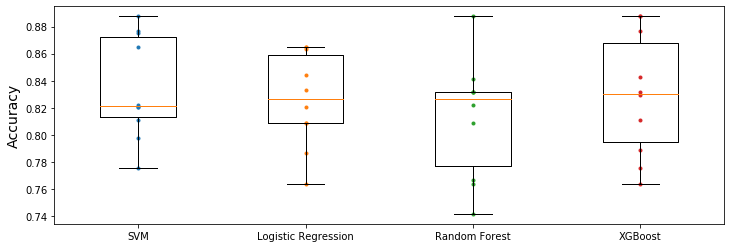

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, log_reg_scores, ".")
plt.plot([3]*10, forest_scores, ".")
plt.plot([4]*10, xgb_cl_scores, ".")
plt.boxplot([svm_scores, log_reg_scores, forest_scores, xgb_cl_scores], 
            labels=("SVM","Logistic Regression", "Random Forest", "XGBoost"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

### Fine tunning

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
  ]

grid_search = GridSearchCV(svm_clf, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

c_ft = grid_search.best_params_['C']
print(c_ft)

0.9


In [43]:
svm_clf_ft = SVC(C=c_ft, gamma="auto", random_state=42)
svm_clf_ft.fit(X_train, y_train)

SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf_ft.predict(X_test)

In [45]:
svm_scores = cross_val_score(svm_clf_ft, X_train, y_train, cv=10)
svm_scores.mean()

0.8351029962546814

Done! 1/4

In [46]:
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
  ]

grid_search = GridSearchCV(svm_clf, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

c_ft = grid_search.best_params_['C']
print(c_ft)

1


In [47]:
log_reg_ft = LogisticRegression(C=c_ft, random_state=42)
log_reg_ft.fit(X_train, y_train)

C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred = log_reg_ft.predict(X_test)

In [49]:
log_reg_scores = cross_val_score(log_reg_ft, X_train, y_train, cv=10)
log_reg_scores.mean()

C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pedro.allegro\AppData\Local\Continuum\a

0.8260515265009648

Done! 2/4

In [50]:
param_grid = [
    {'n_estimators': [3, 5, 10, 15, 30], 'max_features': [2, 4, 6, 8, 10, 12]}
  ]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_clf, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

max_features_ft = grid_search.best_params_['max_features']
n_estimators_ft = grid_search.best_params_['n_estimators']
grid_search.best_params_

C:\Users\pedro.allegro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_features': 12, 'n_estimators': 10}

In [51]:
forest_clf_ft = RandomForestClassifier(n_estimators=n_estimators_ft, random_state=42, max_features=max_features_ft)
forest_scores = cross_val_score(forest_clf_ft, X_train, y_train, cv=10)
forest_scores.mean()

0.828360855748496

Done! 3/4

In [52]:
param_grid = [
    {'n_estimators': [100, 200, 500, 1000, 1500], 'learning_rate': [0.05, 0.1, 0.2]}
  ]

grid_search = GridSearchCV(xgb_cl, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

n_estimators_ft = grid_search.best_params_['n_estimators']
learning_rate_ft = grid_search.best_params_['learning_rate']
grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 1000}

In [53]:
xgb_cl_ft = XGBClassifier(n_estimators=n_estimators_ft, random_state=42, learning_rate=learning_rate_ft)
xgb_cl_scores = cross_val_score(xgb_cl_ft, X_train, y_train, cv=10)
xgb_cl_scores.mean()

0.8463009306548633

Done! All models are fine-tunned. Let's check for the improvements:

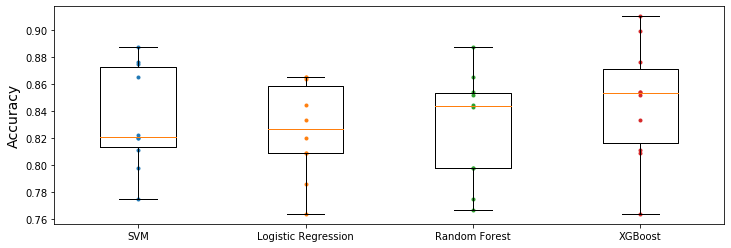

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, log_reg_scores, ".")
plt.plot([3]*10, forest_scores, ".")
plt.plot([4]*10, xgb_cl_scores, ".")
plt.boxplot([svm_scores, log_reg_scores, forest_scores, xgb_cl_scores], 
            labels=("SVM", "Logistic Regression" ,"Random Forest", "XGBoost"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()